In [1]:
import numpy as np
import pandas as pd

In [ ]:
import os
print(os.getcwd())


In [67]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")


In [68]:
import os

folder_path = "D:/Machine Learning projects"

print("CSV files in folder:")
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        print("-", file)


CSV files in folder:
- athlete_events.csv
- noc_regions (1).csv


In [ ]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()  # Hide the main window

file_path = filedialog.askopenfilename()
print("Selected:", file_path)

region_df = pd.read_csv(file_path)


In [ ]:
import pandas as pd

# Load athlete events data
df = pd.read_csv("D:/Machine Learning projects/athlete_events.csv")

# Load region mapping data
region_df = pd.read_csv("D:/Machine Learning projects/noc_region.csv")


In [ ]:
import os

folder_path = "D:/Machine Learning projects"
print("Files in folder:")
print(os.listdir(folder_path))


In [ ]:
print(df.tail())


In [ ]:
print(df.shape)     # Check number of rows and columns
print(df.columns)   # Check column names


In [ ]:
df[df['Season']=='Summer']

In [ ]:
df.shape()

In [ ]:
region_df.tail()

In [ ]:
df=df.merge(region_df.left_on='NOC',how='left')

In [ ]:
df.tail()

In [ ]:
df['region'].unique()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

In [ ]:
df['Medal'].value_counts()

In [ ]:
df=pd.concat([pd.get_dummies(df['Medal'])], axis=1)


In [ ]:
df.shape

In [ ]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("D:/Machine Learning projects/athlete_events.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Check if 'Medal' exists now
print(df.columns)

# Create dummy medal columns
dummy_medals = pd.get_dummies(df['Medal'])

# Combine with df
df = pd.concat([df, dummy_medals], axis=1)

# Group by NOC and sum medal columns
medal_counts = df.groupby('NOC')[['Gold', 'Silver', 'Bronze']].sum()

# Show top 10 countries
print(medal_counts.head(10))


In [ ]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(25)

In [ ]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')].shape[0]


In [ ]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Event','Medal'])

In [ ]:
medal_tally.df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(25)

In [ ]:
medal_tally[medal_tally['NOC']=='IND']

In [3]:
import pandas as pd


df = pd.read_csv("athlete_events.csv")


df = df.drop_duplicates(
    subset=['Team', 'NOC', 'Year', 'Season', 'Games', 'City', 'Sport', 'Event', 'Medal'],
    keep='first'
)


In [7]:
import pandas as pd


df = pd.read_csv('athlete_events.csv')

df = df.drop_duplicates(
    subset=['Team', 'NOC', 'Year', 'Season', 'Games', 'City', 'Sport', 'Event', 'Medal']
)


medal_df = df[df['Medal'].notnull()]


medal_tally = medal_df.groupby('NOC')['Medal'].value_counts().unstack(fill_value=0)


medal_tally['Total'] = medal_tally.sum(axis=1)


print(medal_tally.head())


Medal  Bronze  Gold  Silver  Total
NOC                               
AFG         2     0       0      2
AHO         0     0       1      1
ALG         8     5       4     17
ANZ         5     3       4     12
ARG        28    21      25     74


In [8]:
medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(25)

Medal,NOC,Gold,Silver,Bronze
0,USA,1131,901,792
1,URS,471,373,353
2,GER,321,345,341
3,GBR,289,321,312
4,FRA,265,287,334
5,ITA,256,225,241
6,CHN,239,184,172
7,RUS,202,183,199
8,SWE,200,215,242
9,GDR,192,165,162


In [10]:
medal_tally.loc['IND']

Medal
Bronze    12
Gold      10
Silver     7
Total     29
Name: IND, dtype: int64

In [12]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']


In [13]:
medal_tally

Medal,Bronze,Gold,Silver,Total
NOC,,,,
AFG,2,0,0,2
AHO,0,0,1,1
ALG,8,5,4,17
ANZ,5,3,4,12
ARG,28,21,25,74
...,...,...,...,...
VIE,0,1,3,4
WIF,2,0,0,2
YUG,29,26,32,87


In [14]:
df['Year'].unique().tolist()

[1992,
 2012,
 1920,
 1900,
 1988,
 1994,
 1932,
 2002,
 1952,
 1980,
 2000,
 1996,
 1912,
 1924,
 2014,
 1948,
 1998,
 2006,
 2008,
 2016,
 2004,
 1960,
 1964,
 1984,
 1968,
 1972,
 1936,
 1956,
 1928,
 1976,
 2010,
 1906,
 1904,
 1908,
 1896]

In [18]:
years = sorted(df['Year'].dropna().unique())
print(years)


[1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]


In [20]:
years.insert(0,'overall')

In [21]:
years

['overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

In [26]:
import pandas as pd

# Step 1: Load athlete data
df = pd.read_csv('athlete_events.csv')

# Step 2: Create sample noc_regions dataframe
region_df = pd.DataFrame({
    'NOC': ['USA', 'IND', 'CHN', 'GBR'],
    'region': ['United States', 'India', 'China', 'United Kingdom']
})

# Step 3: Merge to get the 'region' column
df = df.merge(region_df, on='NOC', how='left')

# Display first few rows to verify
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN


In [32]:
import pandas as pd

df = pd.read_csv('athlete_events.csv')

# Remove duplicates for team medals
medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

# Remove null medals
medal_df = medal_df[medal_df['Medal'].notnull()]

# Group by country code (NOC)
medal_tally = medal_df.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)

medal_tally['Total'] = medal_tally.sum(axis=1)
medal_tally = medal_tally.sort_values(by='Total', ascending=False).reset_index()

print(medal_tally.head(10))


Medal  NOC  Bronze  Gold  Silver  Total
0      USA     792  1131     901   2824
1      URS     353   471     373   1197
2      GER     341   321     345   1007
3      GBR     312   289     321    922
4      FRA     334   265     287    886
5      ITA     241   256     225    722
6      SWE     242   200     215    657
7      CHN     172   239     184    595
8      RUS     199   202     183    584
9      GDR     162   192     165    519


In [35]:
import pandas as pd

# Load datasets
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

# Merge on 'NOC' to get region (country) names
df = df.merge(region_df, on='NOC', how='left')

# Get all unique country names
countries = df['region'].dropna().unique().tolist()
countries.sort()

# Display
print("Total Countries in Olympics:", len(countries))
print("Sample Countries:", countries[:10])


Total Countries in Olympics: 205
Sample Countries: ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba']


In [38]:
import pandas as pd
import numpy as np

# Load the datasets
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

# Merge to get full region (country) names
df = df.merge(region_df, on='NOC', how='left')

# Get unique country names
countries = np.unique(df['region'].dropna().values.tolist())

# Display
print("Total Countries in Olympics:", len(countries))
print("Sample Countries:", countries[:10])


Total Countries in Olympics: 205
Sample Countries: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua' 'Argentina' 'Armenia' 'Aruba']


In [40]:
years = df['Year'].unique().tolist()


In [41]:
country.sort()

In [43]:
import pandas as pd

df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")


df = df.merge(region_df, on="NOC", how="left")


country_participation = df.groupby('region')['ID'].nunique().reset_index()
country_participation.columns = ['Country', 'Number_of_Athletes']


country_participation = country_participation.sort_values(by='Number_of_Athletes', ascending=False)


print(country_participation.head(10))


       Country  Number_of_Athletes
191        USA                9653
67     Germany                7575
190         UK                6281
63      France                6170
151     Russia                5610
87       Italy                4935
33      Canada                4812
90       Japan                4067
10   Australia                3870
176     Sweden                3787


In [44]:
country.insert(0,'overall')

In [46]:
import pandas as pd

# Load the data files
df = pd.read_csv("athlete_events.csv")
noc_df = pd.read_csv("noc_regions.csv")

# Merge the two DataFrames on 'NOC' to get the 'region' info
df = df.merge(noc_df, on='NOC', how='left')

# Drop NaN values in region and get the unique list of countries
countries = df['region'].dropna().unique().tolist()

# Sort the countries alphabetically
countries.sort()

# Print the total number and first 10 countries
print("Total countries:", len(countries))
print("First 10 countries:", countries[:10])


Total countries: 205
First 10 countries: ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba']


In [49]:
def fetch_medal_tally(df, year, country):
    
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]
    elif year == 'Overall' and country != 'Overall':
        temp_df = medal_df[medal_df['region'] == country]
    elif year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == year]
    else:
        temp_df = medal_df

    if country != 'Overall':
        tally = temp_df.groupby('Year').agg({'Medal': 'count'}).reset_index()
    else:
        tally = temp_df.groupby('region')['Medal'].value_counts().unstack(fill_value=0).reset_index()
        tally['Total'] = tally.get('Gold', 0) + tally.get('Silver', 0) + tally.get('Bronze', 0)

    return tally


In [61]:
# Assuming df is already defined
result = fetch_medal_tally(df, year='overall', country='India')
print(result)


Empty DataFrame
Columns: [Year, Medal]
Index: []


In [62]:
medal_df=df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [63]:
medal_df[medal_df['Year'] == 2016].head(10)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain,NaN
143,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,NaN,Spain,NaN
144,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Pommelled Horse,NaN,Spain,NaN
148,55,Antonio Abadia Beci,M,26.0,170.0,65.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 5,000 metres",NaN,Spain,NaN
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,Italy,NaN
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan,NaN


In [64]:
medal_df[medal_df['Year'] == 2016][['Name', 'Team', 'Sport', 'Event', 'Medal']].head(10)


,Name,Team,Sport,Event,Medal
80,Andreea Aanei,Romania,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
139,Nstor Abad Sanjun,Spain,Gymnastics,Gymnastics Men's Individual All-Around,NaN
140,Nstor Abad Sanjun,Spain,Gymnastics,Gymnastics Men's Floor Exercise,NaN
141,Nstor Abad Sanjun,Spain,Gymnastics,Gymnastics Men's Parallel Bars,NaN
142,Nstor Abad Sanjun,Spain,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
143,Nstor Abad Sanjun,Spain,Gymnastics,Gymnastics Men's Rings,NaN
144,Nstor Abad Sanjun,Spain,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
148,Antonio Abadia Beci,Spain,Athletics,"Athletics Men's 5,000 metres",NaN
158,Giovanni Abagnale,Italy,Rowing,Rowing Men's Coxless Pairs,Bronze
161,Patimat Abakarova,Azerbaijan,Taekwondo,Taekwondo Women's Flyweight,Bronze


In [65]:
medal_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271095,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN
271096,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN
271097,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 10,000 metres",NaN,Poland,NaN
271098,135559,Pawe Jan Zygmunt,M,33.0,182.0,79.0,Poland,POL,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN


In [66]:
import pandas as pd
import numpy as np

# Load CSV files
athlete_df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

# Merge region info
df = athlete_df.merge(region_df, on='NOC', how='left')

# Drop duplicate medals
df.drop_duplicates(subset=['Team','NOC','Year','Season','Games','City','Sport','Event','Medal'], inplace=True)

# Create medal-specific DataFrame
medal_df = df[df['Medal'].notnull()]

# 🔍 View top 10 medal winners from 2016
medal_2016 = medal_df[medal_df['Year'] == 2016][['Name', 'Team', 'Sport', 'Event', 'Medal']].head(10)
print(medal_2016)


                                 Name        Team       Sport  \
158                 Giovanni Abagnale       Italy      Rowing   
161                 Patimat Abakarova  Azerbaijan   Taekwondo   
175                         Luc Abalo      France    Handball   
450              Saeid Morad Abdevali        Iran   Wrestling   
794       Denis Mikhaylovich Ablyazin      Russia  Gymnastics   
796       Denis Mikhaylovich Ablyazin      Russia  Gymnastics   
797       Denis Mikhaylovich Ablyazin      Russia  Gymnastics   
814              Matthew "Matt" Abood   Australia    Swimming   
1029  Alejandro "lex" Abrines Redondo       Spain  Basketball   
1080                  Ahmad Abughaush      Jordan   Taekwondo   

                                              Event   Medal  
158                      Rowing Men's Coxless Pairs  Bronze  
161                     Taekwondo Women's Flyweight  Bronze  
175                         Handball Men's Handball  Silver  
450       Wrestling Men's Middleweig

In [ ]:
medal_tally = medal_df.groupby('region')['Medal'].count().sort_values(ascending=False).reset_index()
medal_tally.columns = ['Country', 'Total Medals']
print(medal_tally.head(10))


In [ ]:
medal_tally = medal_df.groupby('region')['Medal'].count().sort_values(ascending=False).reset_index()
medal_tally.columns = ['Country', 'Total Medals']
print(medal_tally.head(10))


In [ ]:
participation = df.drop_duplicates(subset=['Year', 'region'])[['Year', 'region']].groupby('Year').count()
participation.columns = ['No. of Participating Countries']
participation.plot(kind='line', title='Countries Participating Over the Years')


In [ ]:
gender_participation = df.drop_duplicates(subset=['Year', 'ID'])[['Year', 'Sex']].groupby(['Year', 'Sex']).size().unstack()
gender_participation.plot(kind='line', title='Gender Participation Over the Years')


In [ ]:
top_athletes = medal_df['Name'].value_counts().head(10)
print(top_athletes)


In [ ]:
def fetch_medal_tally(df, year, country):
    temp_df = df.copy()
    if year != "Overall":
        temp_df = temp_df[temp_df["Year"] == int(year)]
    if country != "Overall":
        temp_df = temp_df[temp_df["region"] == country]

    medal_tally = temp_df.groupby('region')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)
    return medal_tally


In [75]:
df['Year'].unique().shape

(35,)

In [76]:
medal_df[(medal_df['Year']==2016) & (medal_df['region']=='India')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
147624,74069,Sakshi Malik,F,23.0,162.0,58.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Women's Lightweight, Freestyle",Bronze,India,NaN
220929,110974,"Pusarla Venkata ""P. V."" Sindhu",F,21.0,179.0,65.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Women's Singles,Silver,India,NaN


In [80]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")


df = df.merge(region_df, on="NOC", how="left")


In [3]:
!pip install pandas


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 929.6 kB/s eta 0:00:12
   -- ------------------------------------- 0.8/11.0 MB 1.0 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 1.0 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 1.0 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/11.0 MB 699.0 kB/s eta 0:00:15
   ---- ----------------------------------- 1.3/11.0 MB 699.0 kB/s eta 0:00:14
   ---- ----------------------------------- 1.3/1

In [7]:
import pandas as pd

# Load datasets
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

# Merge on NOC column to add region info
df = df.merge(region_df, on="NOC", how="left")

print(df.columns)  # Check if 'region' is now present


Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')


In [4]:
import pandas as pd

# Load CSV file into df
df = pd.read_csv("athlete_events.csv")

# Now this will work
print(df['City'].unique().shape)


(42,)


In [5]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [8]:
df['region'].unique().shape

(206,)

In [10]:
df.drop_duplicates(['Year', 'region'])['Year'].value_counts()


Year
2016    204
2012    203
2008    202
2004    200
2000    199
1996    196
1992    169
1988    157
1984    146
1972    120
1968    111
1964     94
1976     92
1980     89
2014     88
1960     83
2010     81
2006     78
2002     76
1956     74
1998     72
1994     67
1952     67
1948     61
1936     50
1932     47
1924     46
1928     46
1900     31
1912     29
1920     29
1908     22
1906     20
1904     14
1896     12
Name: count, dtype: int64

In [12]:
df.drop_duplicates(['Year', 'region'])['Year'].value_counts().sort_index().sort_values()


Year
1896     12
1904     14
1906     20
1908     22
1912     29
1920     29
1900     31
1924     46
1928     46
1932     47
1936     50
1948     61
1952     67
1994     67
1998     72
1956     74
2002     76
2006     78
2010     81
1960     83
2014     88
1980     89
1976     92
1964     94
1968    111
1972    120
1984    146
1988    157
1992    169
1996    196
2000    199
2004    200
2008    202
2012    203
2016    204
Name: count, dtype: int64

In [13]:
nations_over_time=df.drop_duplicates(['Year', 'region'])['Year'].value_counts()


In [6]:
import pandas as pd

# Load data
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

# Preprocessing
df = df[df['Season'] == 'Summer']  # Only Summer Olympics
df = df.merge(region_df, on='NOC', how='left')  # Add region info
df.drop_duplicates(inplace=True)  # Remove duplicates

df.fillna({'region': 'Unknown'}, inplace=True)


# Nations over time
nations_over_time = (
    df.drop_duplicates(['Year', 'region'])  # Unique country per year
      .groupby('Year')
      .size()
      .reset_index(name='No. of countries')
)

# Rename for clarity
nations_over_time.rename(columns={'Year': 'Edition'}, inplace=True)

# Check result
print(nations_over_time.head())


   Edition  No. of countries
0     1896                12
1     1900                31
2     1904                14
3     1906                20
4     1908                22


In [7]:
import plotly.express as px

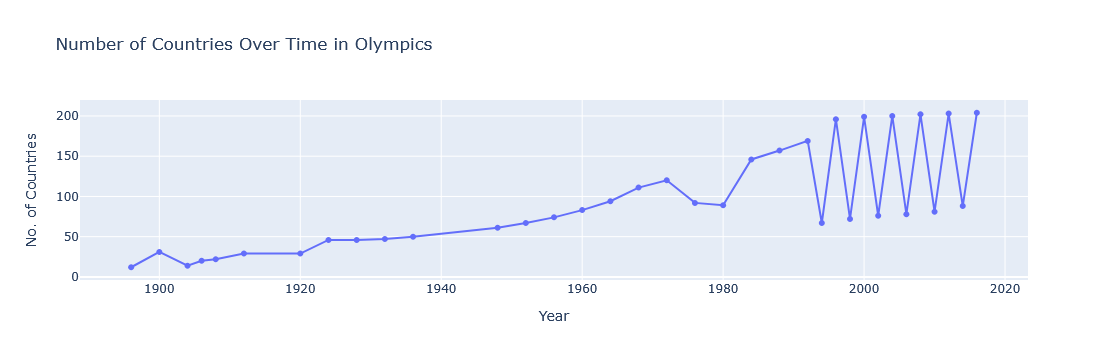

In [11]:
import pandas as pd
import plotly.express as px

# Load datasets
df = pd.read_csv("athlete_events.csv")
regions_df = pd.read_csv("noc_regions.csv")

# Merge datasets
df = df.merge(regions_df, on='NOC', how='left')

# Fill missing region values
df['region'] = df['region'].fillna('Unknown')

# Get number of unique countries each year
nations_over_time = (
    df.drop_duplicates(['Year', 'region'])  # Keep only unique Year-country combinations
      .groupby('Year')['region']
      .nunique()  # Count unique countries
      .reset_index()  # Convert Year back to a column
      .rename(columns={'region': 'No. of Countries'})
)

# Plot line graph
fig = px.line(
    nations_over_time,
    x='Year',
    y='No. of Countries',
    markers=True,
    title='Number of Countries Over Time in Olympics'
)
fig.show()


In [13]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


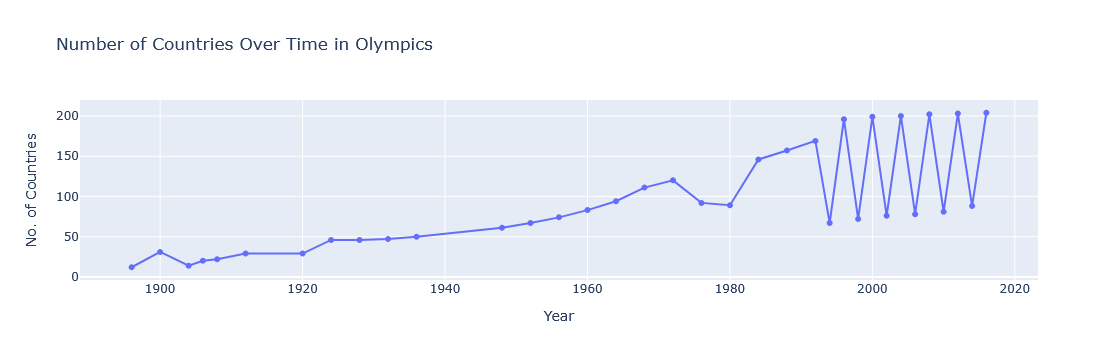

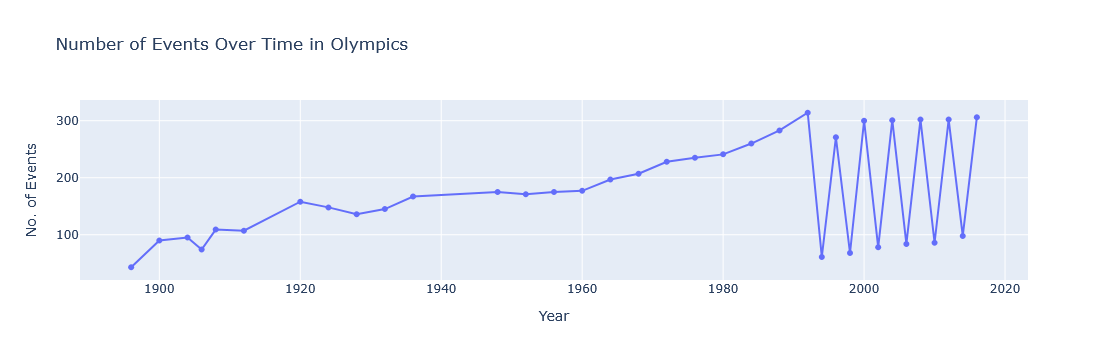

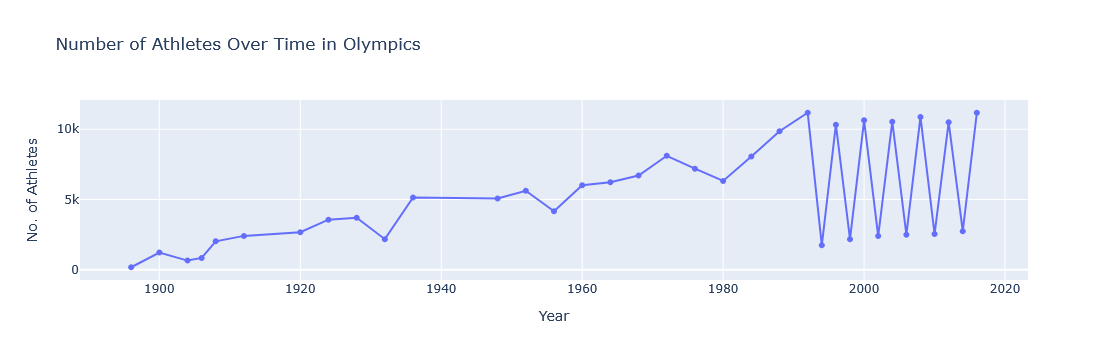

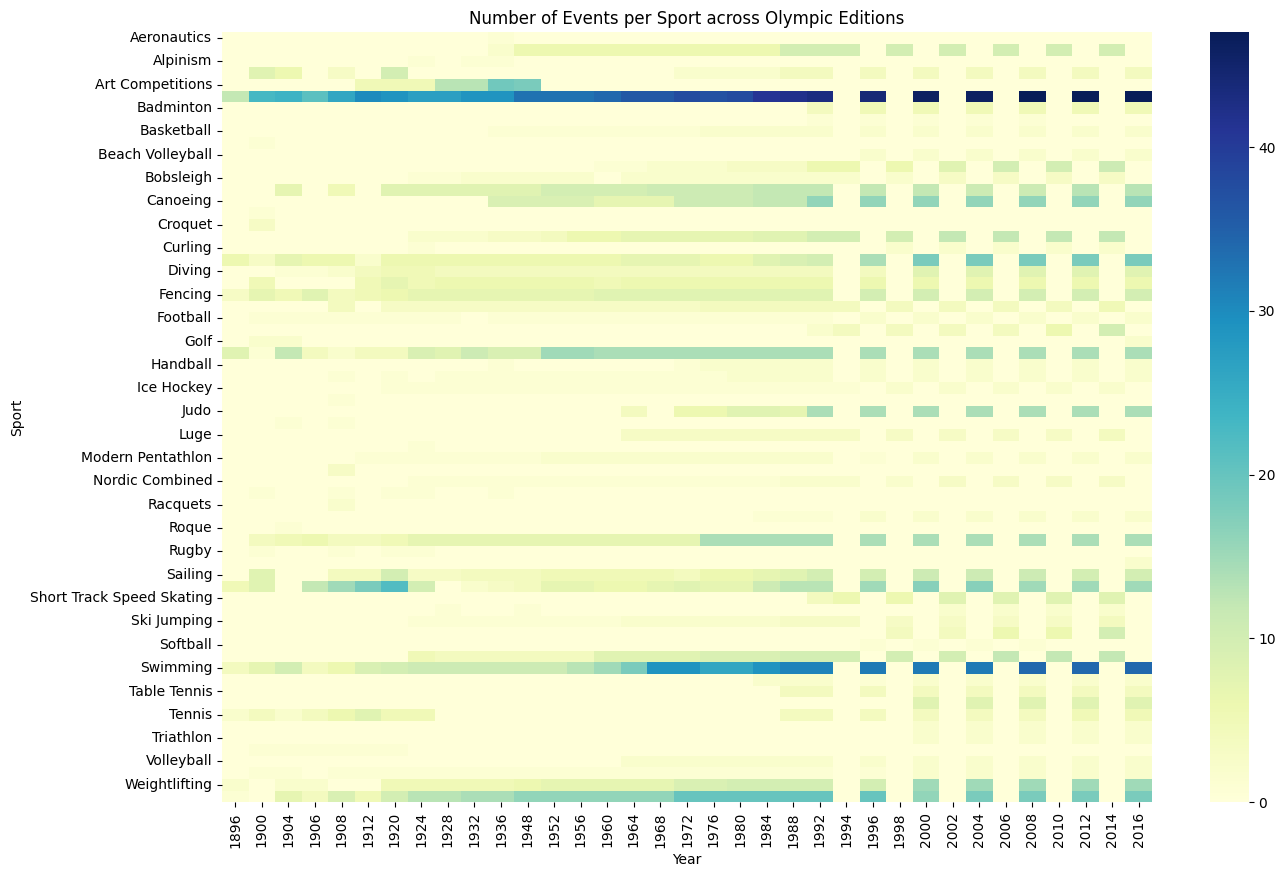

In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------
# Load and merge data
# -------------------
df = pd.read_csv("athlete_events.csv")
regions_df = pd.read_csv("noc_regions.csv")

df = df.merge(regions_df, on='NOC', how='left')
df['region'] = df['region'].fillna('Unknown')

# -------------------
# 1. Number of Countries Over Time
# -------------------
nations_over_time = (
    df.drop_duplicates(['Year', 'region'])
      .groupby('Year')['region']
      .nunique()
      .reset_index()
      .rename(columns={'region': 'No. of Countries'})
)

fig = px.line(
    nations_over_time,
    x='Year', y='No. of Countries',
    markers=True,
    title='Number of Countries Over Time in Olympics'
)
fig.show()

# -------------------
# 2. Number of Events Over Time
# -------------------
events_over_time = (
    df.drop_duplicates(['Year', 'Event'])
      .groupby('Year')['Event']
      .count()
      .reset_index()
      .rename(columns={'Event': 'No. of Events'})
)

fig = px.line(
    events_over_time,
    x='Year', y='No. of Events',
    markers=True,
    title='Number of Events Over Time in Olympics'
)
fig.show()

# -------------------
# 3. Number of Athletes Over Time
# -------------------
athletes_over_time = (
    df.drop_duplicates(['Year', 'Name'])
      .groupby('Year')['Name']
      .count()
      .reset_index()
      .rename(columns={'Name': 'No. of Athletes'})
)

fig = px.line(
    athletes_over_time,
    x='Year', y='No. of Athletes',
    markers=True,
    title='Number of Athletes Over Time in Olympics'
)
fig.show()

# -------------------
# 4. Heatmap: Sports vs Editions
# -------------------
pivot = df.drop_duplicates(['Year', 'Sport', 'Event']) \
          .pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count') \
          .fillna(0)

plt.figure(figsize=(15,10))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Number of Events per Sport across Olympic Editions")
plt.show()


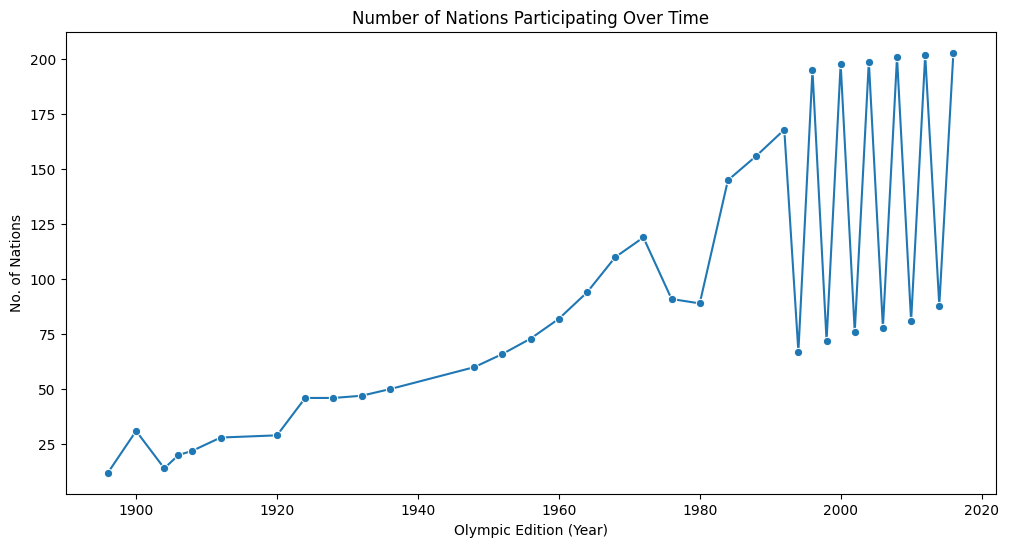

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets (change path if needed)
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

# Merge to add "region" column
df = df.merge(region_df, on="NOC", how="left")

# Nations over time
nations_over_time = df.drop_duplicates(["Year", "region"]) \
                      .groupby("Year")["region"].count().reset_index()

# Rename columns for clarity
nations_over_time.rename(columns={"Year": "Edition", "region": "No. of Nations"}, inplace=True)

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=nations_over_time, x="Edition", y="No. of Nations", marker="o")
plt.title("Number of Nations Participating Over Time")
plt.xlabel("Olympic Edition (Year)")
plt.ylabel("No. of Nations")
plt.show()


In [11]:
x=df.drop_duplicates(['Year','Sport','Event'])

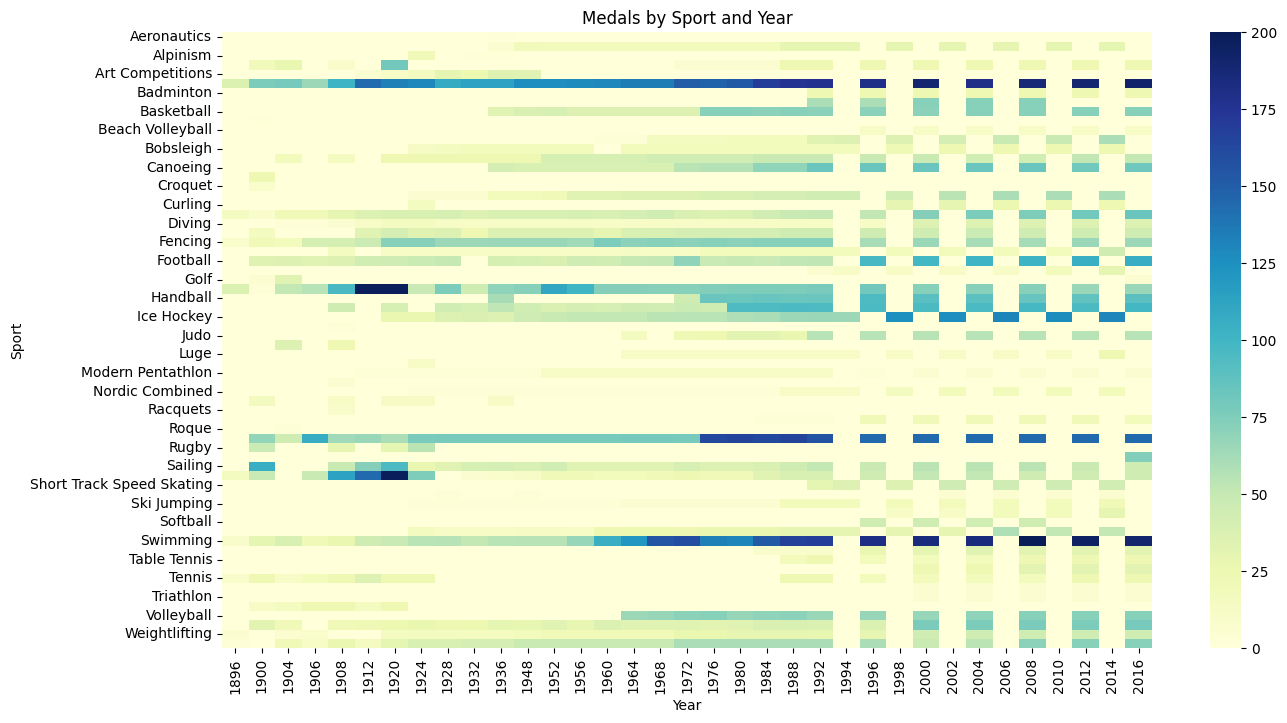

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (update path if needed)
df = pd.read_csv("athlete_events.csv")

# Pivot table: Sport vs Year with medal counts
pivot = df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0).astype(int)

# Plot heatmap
plt.figure(figsize=(15,8))
import seaborn as sns
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Medals by Sport and Year")
plt.show()


In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("athlete_events.csv")
noc_df = pd.read_csv("noc_regions.csv")

# Merge with NOC regions
df = df.merge(noc_df, on="NOC", how="left")

print(df.head())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightwei

In [5]:
# Count medals per athlete
df1 = df.dropna(subset=["Medal"]) \
        .groupby("Name")["Medal"] \
        .count() \
        .reset_index()

# Rename for clarity
df1.columns = ["Name", "Medal_Count"]

# Merge with original dataframe
merged = df.merge(df1, on="Name", how="left")

# Fill NaN with 0 for athletes who never won medals
merged["Medal_Count"] = merged["Medal_Count"].fillna(0).astype(int)

print(merged.head())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  Medal_Count  
0       Basketball Men's Basketball   NaN        China   NaN            0  
1     

In [15]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=["Medal"])

    if sport != "Overall":
        temp_df = temp_df[temp_df["Sport"] == sport]

    # Count medals per athlete
    medal_counts = temp_df.groupby("Name")["Medal"].count().reset_index()
    medal_counts = medal_counts.rename(columns={"Medal": "Total_Medals"})

    # Get the most frequent Sport and region for each athlete
    sport_region = temp_df.groupby("Name").agg({
        "Sport": lambda x: x.value_counts().index[0],
        "region": lambda x: x.value_counts().index[0]
    }).reset_index()

    # Merge counts with sport & region
    top_athletes = medal_counts.merge(sport_region, on="Name", how="left")

    # Sort by total medals
    top_athletes = top_athletes.sort_values("Total_Medals", ascending=False).head(15)

    return top_athletes


In [17]:
top_gymnasts = most_successful(df, "Gymnastics")
print(top_gymnasts)


                                    Name  Total_Medals       Sport  \
736   Larysa Semenivna Latynina (Diriy-)            18  Gymnastics   
914         Nikolay Yefimovich Andrianov            15  Gymnastics   
154          Borys Anfiyanovych Shakhlin            13  Gymnastics   
1136                         Takashi Ono            13  Gymnastics   
28               Aleksey Yuryevich Nemov            12  Gymnastics   
1072                          Sawao Kato            12  Gymnastics   
1201           Viktor Ivanovych Chukarin            11  Gymnastics   
1228              Vra slavsk (-Odloilov)            11  Gymnastics   
1013         Polina Hryhorivna Astakhova            10  Gymnastics   
11                      Akinori Nakayama            10  Gymnastics   
1306           gnes Keleti-Srkny (Klein)            10  Gymnastics   
23       Aleksandr Nikolayevich Dityatin            10  Gymnastics   
1212       Vitaly Venediktovich Shcherbo            10  Gymnastics   
1286           Yury 

Country Wise

In [18]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [20]:
temp_df=df.dropna(subset=['Medal'])

In [23]:
temp_df[temp_df['region']=='USA']
temp_df.groupby('Year').count()['Medal']

Year
1896     143
1900     604
1904     486
1906     458
1908     831
1912     941
1920    1308
1924     962
1928     823
1932     739
1936    1025
1948     987
1952    1033
1956    1043
1960    1058
1964    1215
1968    1256
1972    1414
1976    1531
1980    1602
1984    1698
1988    1845
1992    2030
1994     331
1996    1842
1998     440
2000    2004
2002     478
2004    2001
2006     526
2008    2048
2010     520
2012    1941
2014     597
2016    2023
Name: Medal, dtype: int64

In [26]:
import plotly.express as px


In [10]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Load your Olympics dataset
df = pd.read_csv("athlete_events.csv")
regions_df = pd.read_csv("noc_regions.csv")

# Merge NOC regions
df = df.merge(regions_df, on="NOC", how="left")

# Fill missing regions
df['region'] = df['region'].fillna('Unknown')

# Calculate number of countries participating each year
nations_over_time = (
    df.drop_duplicates(['Year', 'region'])  # Keep unique Year-Country pairs
      .groupby('Year')['region']
      .nunique()  # Count unique countries
      .reset_index()
      .rename(columns={'region': 'No. of Countries'})
)

# Plot line chart using Plotly Express
fig = px.line(
    nations_over_time,
    x='Year',
    y='No. of Countries',
    markers=True,
    title='Number of Countries Over Time in Olympics'
)

fig.show()


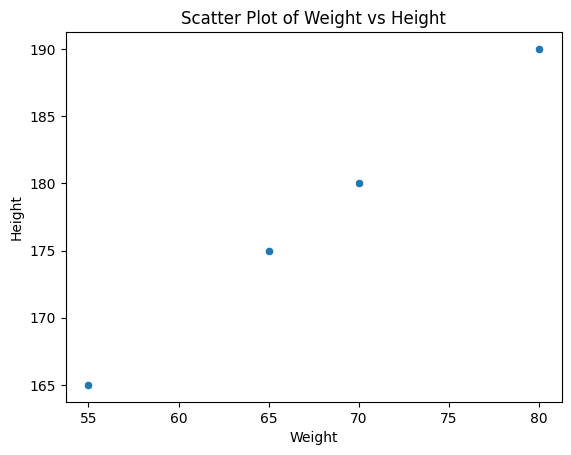

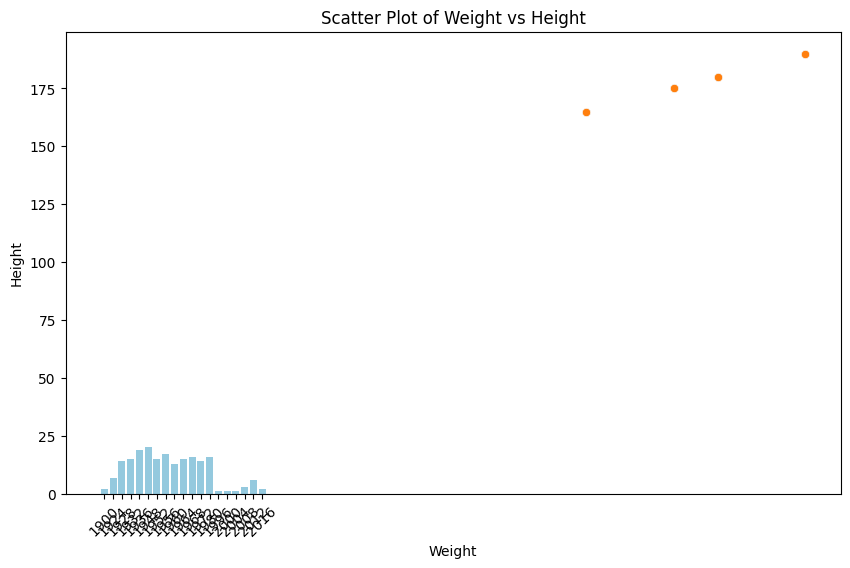

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: only needed for Jupyter notebooks
try:
    get_ipython
    %matplotlib inline
except NameError:
    pass

# Example: Generic DataFrame with Weight and Height columns
# Replace this with your actual DataFrame
athlete_df = pd.DataFrame({
    'Weight': [55, 70, 65, 80],
    'Height': [165, 180, 175, 190]
})

# Check if required columns exist
if 'Weight' in athlete_df.columns and 'Height' in athlete_df.columns:
    # Create the scatter plot
    sns.scatterplot(data=athlete_df, x='Weight', y='Height')

    # Set plot title and labels
    plt.title('Scatter Plot of Weight vs Height')
    plt.xlabel('Weight')
    plt.ylabel('Height')

    # Save the plot to a file
    plt.savefig('scatter_plot_weight_vs_height.png', bbox_inches='tight')

    # Display the plot
    plt.show()
else:
    print("Error: DataFrame must contain 'Weight' and 'Height' columns.")


Year                  1900  1920  1924  1928  1932  1936  1948  1952  1956  \
Sport                                                                        
Alpine Skiing            0     0     0     0     0     0     0     0     0   
Alpinism                 0     0     7     0     0     0     0     0     0   
Archery                  0     0     0     0     0     0     0     0     0   
Art Competitions         0     0     0     0     0     0     0     0     0   
Athletics                2     0     0     0     0     0     0     0     0   
Badminton                0     0     0     0     0     0     0     0     0   
Basketball               0     0     0     0     0     0     0     0     0   
Boxing                   0     0     0     0     0     0     0     0     0   
Cross Country Skiing     0     0     0     0     0     0     0     0     0   
Cycling                  0     0     0     0     0     0     0     0     0   
Diving                   0     0     0     0     0     0     0  

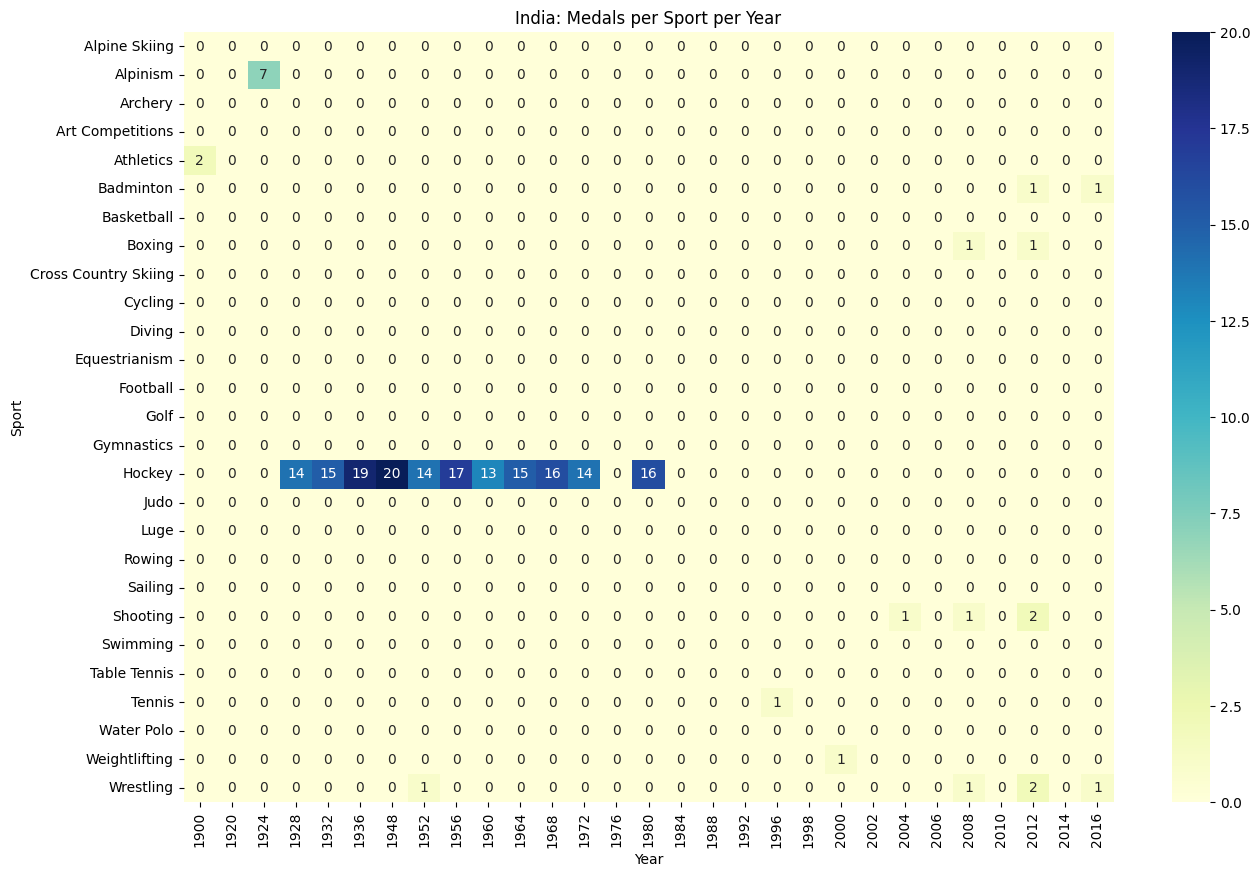

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your preprocessed DataFrame
# Example: df = pd.read_csv("athlete_events.csv")
# Or if you have a preprocessing function:
# df = prep.preprocesser()

# Filter for India
india_df = df[df['region'] == 'India']

# Create a pivot table: number of medals per sport per year
pivot = india_df.pivot_table(
    index='Sport',
    columns='Year',
    values='Medal',    # you can use 'ID' if you want total entries
    aggfunc='count',
    fill_value=0
)

# Display the pivot table
print(pivot)

# Optional: plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("India: Medals per Sport per Year")
plt.show()


In [15]:
import plotly.figure_factory as ft

In [16]:
import pandas as pd

# Filter only rows where Medal is not null
athlete_df = df[df['Medal'].notna()]

# Now filter by medal type and get the Age column
gold_ages = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
silver_ages = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
bronze_ages = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()


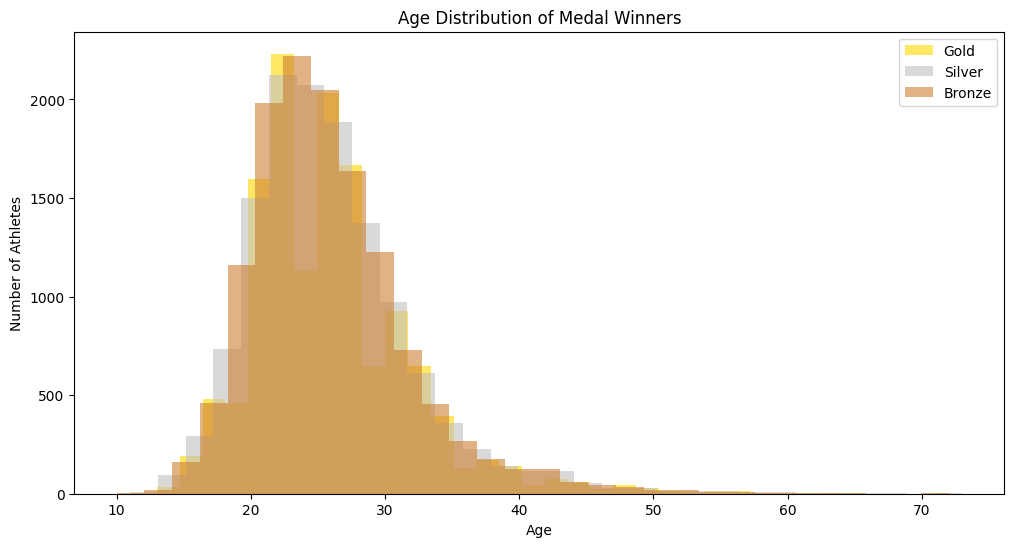

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only medal winners and drop missing Age values
athlete_df = df[df['Medal'].notna()]

gold_ages = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
silver_ages = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
bronze_ages = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

# Plot histogram
plt.figure(figsize=(12,6))
plt.hist(gold_ages, bins=30, alpha=0.6, label='Gold', color='gold')
plt.hist(silver_ages, bins=30, alpha=0.6, label='Silver', color='silver')
plt.hist(bronze_ages, bins=30, alpha=0.6, label='Bronze', color='#cd7f32')  # bronze color

plt.xlabel("Age")
plt.ylabel("Number of Athletes")
plt.title("Age Distribution of Medal Winners")
plt.legend()
plt.show()


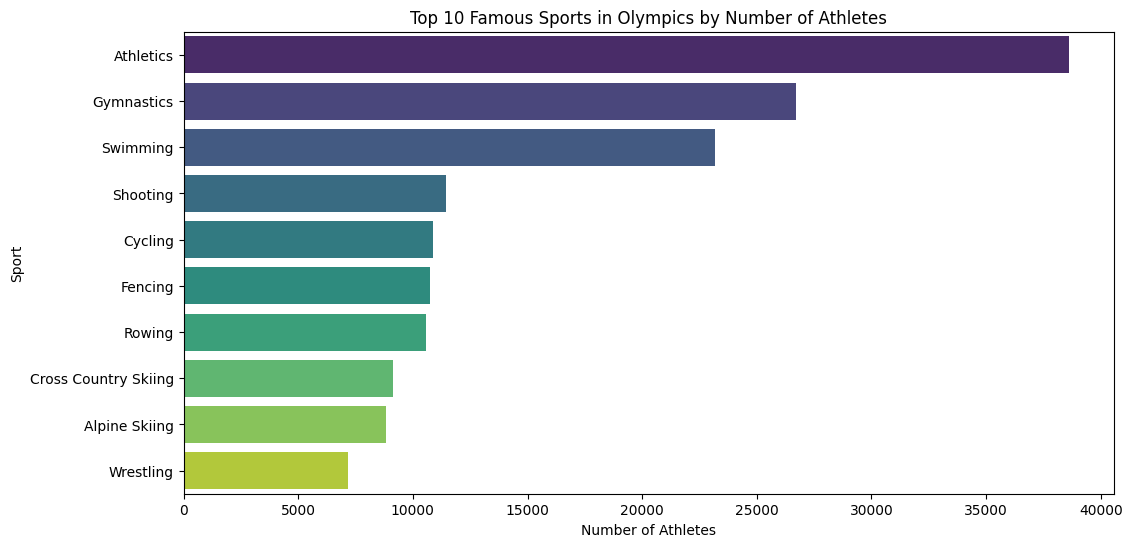

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("athlete_events.csv")

# Count number of athletes per sport
top_sports = df['Sport'].value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_sports.values,
    y=top_sports.index,
    hue=top_sports.index,   # explicitly assign hue
    palette="viridis",
    legend=False            # hide duplicate legend
)
plt.xlabel("Number of Athletes")
plt.ylabel("Sport")
plt.title("Top 10 Famous Sports in Olympics by Number of Athletes")
plt.show()


In [19]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install streamlit-jupyter


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
# preprocessor.py
import pandas as pd

def preprocessor():
    # Load datasets
    df = pd.read_csv("athlete_events.csv")
    regions = pd.read_csv("noc_regions.csv")

    # Merge with regions
    df = df.merge(regions, how="left", on="NOC")

    # Drop duplicates
    df.drop_duplicates(inplace=True)

    # Convert Medal to dummy columns
    df["Gold"] = (df["Medal"] == "Gold").astype(int)
    df["Silver"] = (df["Medal"] == "Silver").astype(int)
    df["Bronze"] = (df["Medal"] == "Bronze").astype(int)

    return df

def country_year_list(df):
    # Unique years
    years = df["Year"].unique().tolist()
    years.sort()
    years.insert(0, "Overall")

    # Unique countries
    countries = df["region"].dropna().unique().tolist()
    countries.sort()
    countries.insert(0, "Overall")

    return years, countries


In [22]:
import pandas as pd

# Sample DataFrame creation (for context)
athlete_df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Medal': ['Gold', 'Silver', None, 'Bronze']
})

# Correct approach #1: Assigning filled values back to the column
athlete_df['Medal'] = athlete_df['Medal'].fillna('No Medal')

# Alternatively, correct approach #2: Using loc indexer
# athlete_df.loc[athlete_df['Medal'].isna(), 'Medal'] = 'No Medal'

print(athlete_df)


      Name     Medal
0    Alice      Gold
1      Bob    Silver
2  Charlie  No Medal
3    David    Bronze


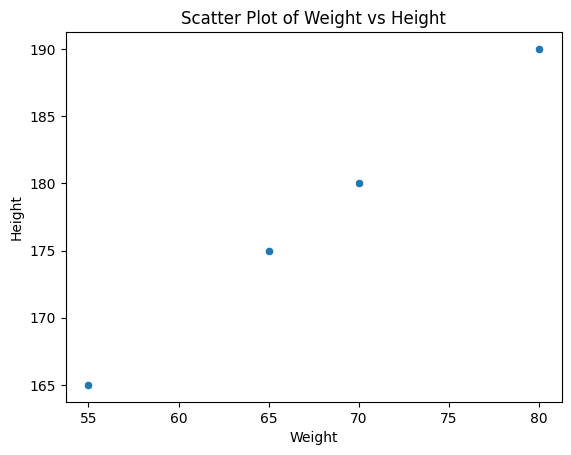

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation (for context)
athlete_df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Weight': [55, 70, 65, 80],
    'Height': [165, 180, 175, 190]
})

# Create the scatter plot
sns.scatterplot(data=athlete_df, x='Weight', y='Height')

# Set plot title and labels
plt.title('Scatter Plot of Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')

# Save the plot to a file
plt.savefig('scatter_plot_weight_vs_height.png')

# Optionally, you can still call plt.show() if you want to see it in an interactive window
plt.show()
